In [35]:
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [36]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [41]:
df = pd.read_csv('den_time_series.csv')

In [42]:
df

,dt,cases
0,2008-01-01,0
1,2008-02-01,0
2,2008-03-01,0
3,2008-04-01,0
4,2008-05-01,0
...,...,...
127,2018-08-01,1796
128,2018-09-01,3087
129,2018-10-01,2406
130,2018-11-01,1186


STL decomposition

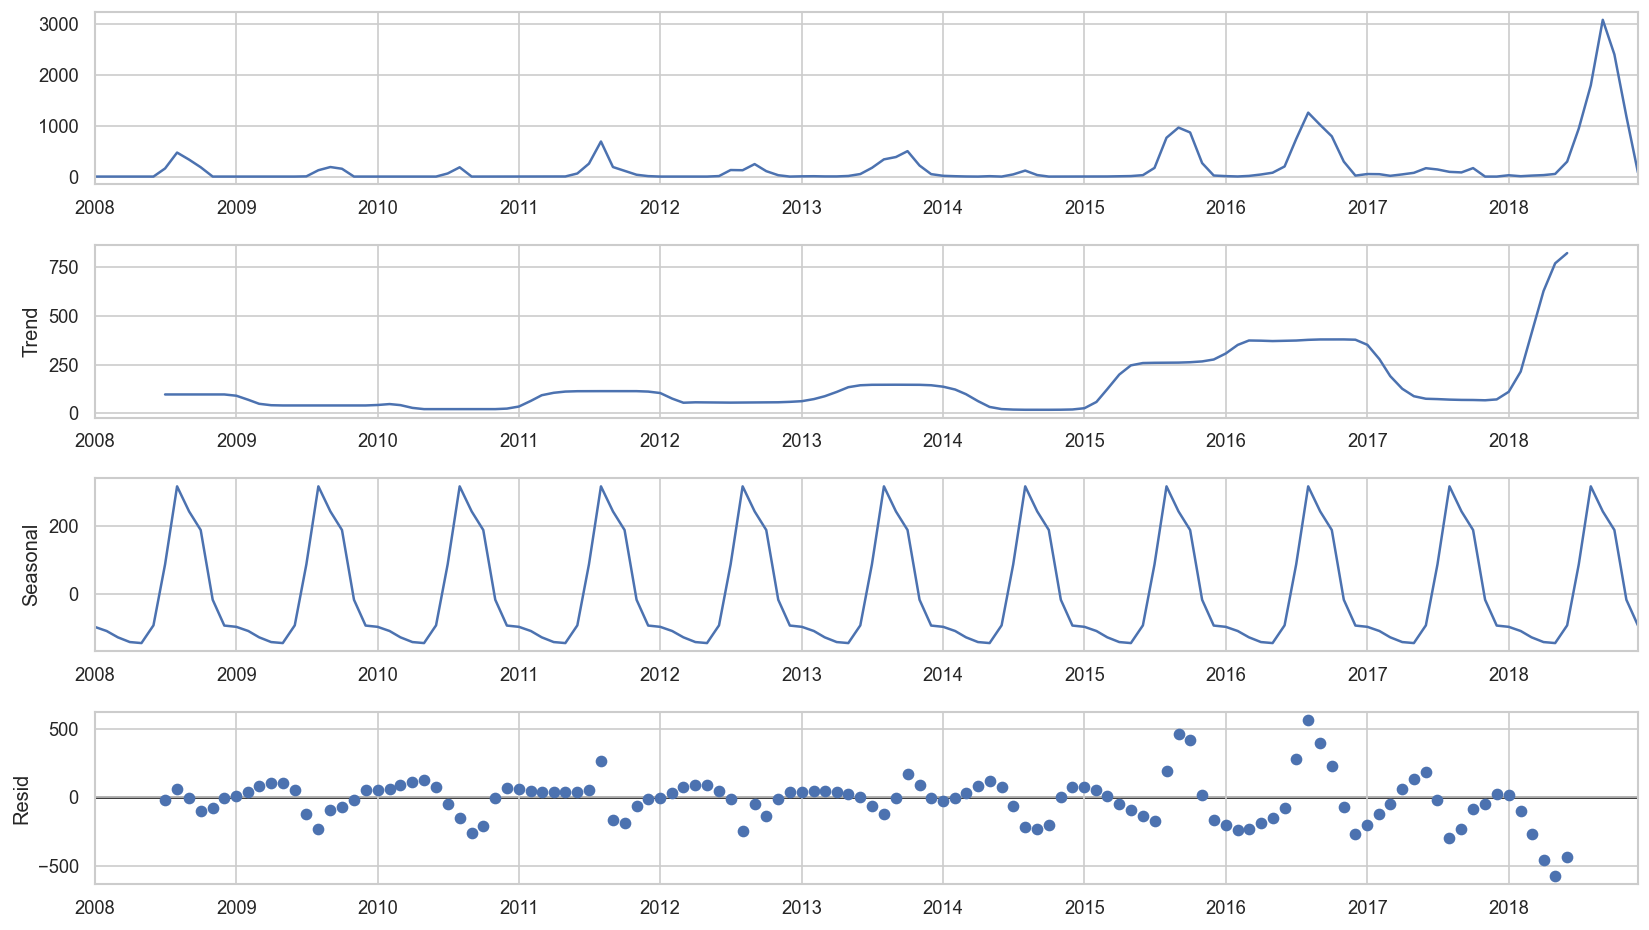

In [43]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(lim_catfish_sales,model='additive')
fig = result.plot()

In [46]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.cases.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.403540
p-value: 0.000000


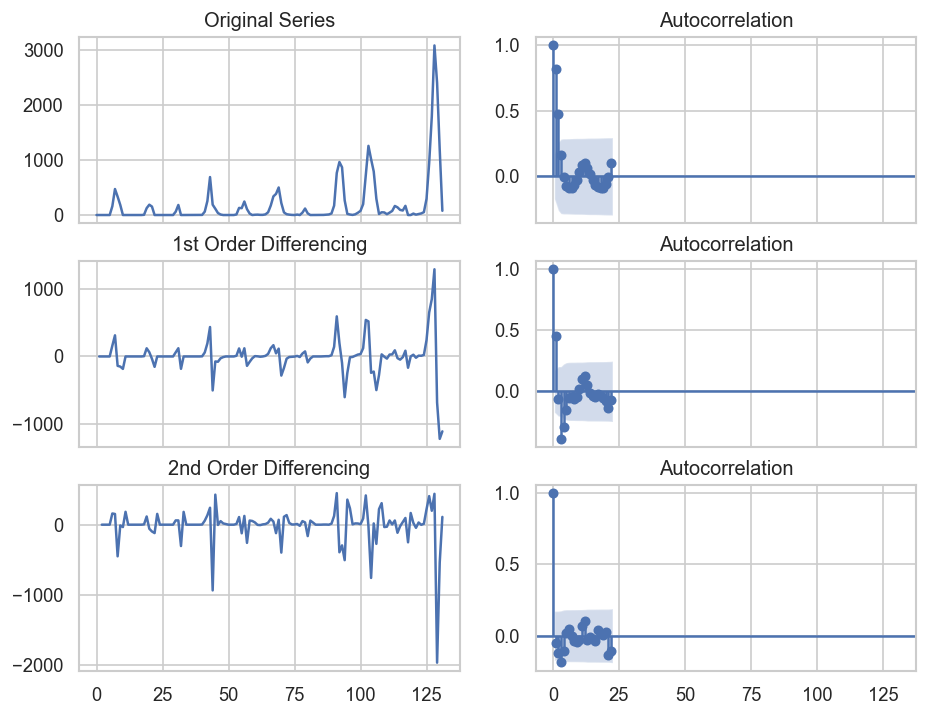

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.cases); axes[0, 0].set_title('Original Series')
plot_acf(df.cases, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.cases.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.cases.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.cases.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.cases.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

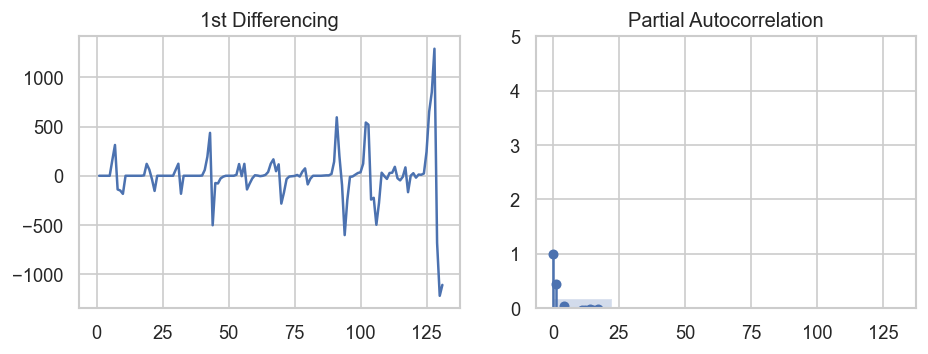

In [51]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.cases.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.cases.diff().dropna(), ax=axes[1])

plt.show()

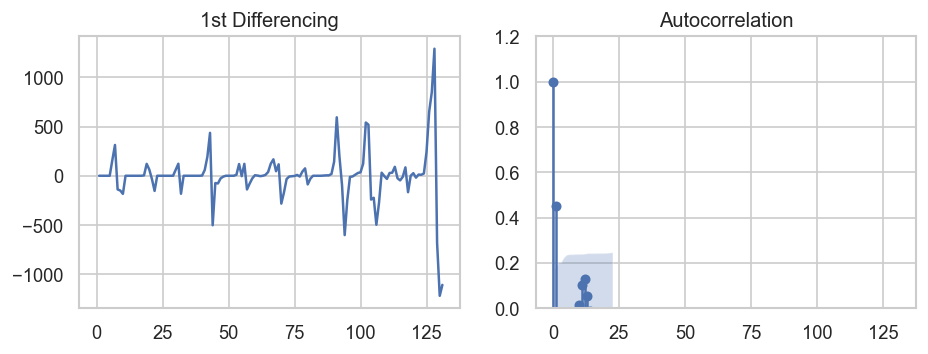

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.cases.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.cases.diff().dropna(), ax=axes[1])

plt.show()

In [55]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.cases, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.cases   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -888.582
Method:                       css-mle   S.D. of innovations            210.912
Date:                Mon, 07 Nov 2022   AIC                           1787.164
Time:                        22:01:12   BIC                           1801.540
Sample:                             1   HQIC                          1793.005
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3678      2.281      1.477      0.140      -1.102       7.838
ar.L1.D.cases     0.6932      0.070      9.885      0.000       0.556       0.831
ma.L1.D.cases    -0.4657      0.069     

In [57]:
# 1,1,1 ARIMA Model
model = ARIMA(df.cases, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.cases   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -895.050
Method:                       css-mle   S.D. of innovations            224.104
Date:                Mon, 07 Nov 2022   AIC                           1798.100
Time:                        22:03:16   BIC                           1809.601
Sample:                             1   HQIC                          1802.773
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0529     36.768     -0.137      0.891     -77.117      67.011
ar.L1.D.cases     0.3190      0.130      2.457      0.014       0.064       0.573
ma.L1.D.cases     0.2840      0.112     

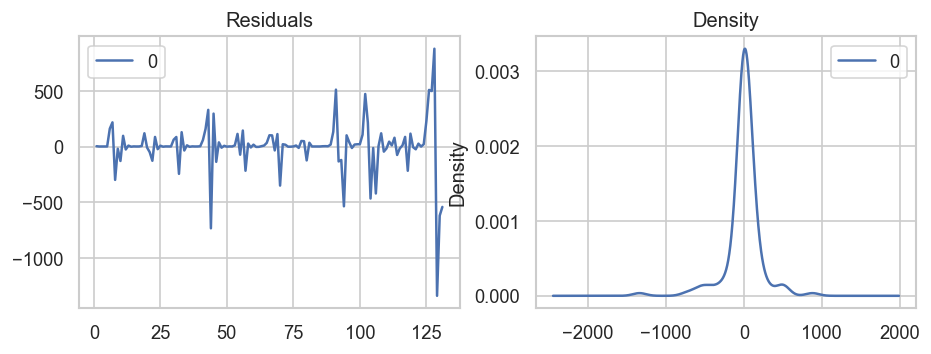

In [58]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [60]:
df

,dt,cases
0,2008-01-01,0
1,2008-02-01,0
2,2008-03-01,0
3,2008-04-01,0
4,2008-05-01,0
...,...,...
127,2018-08-01,1796
128,2018-09-01,3087
129,2018-10-01,2406
130,2018-11-01,1186


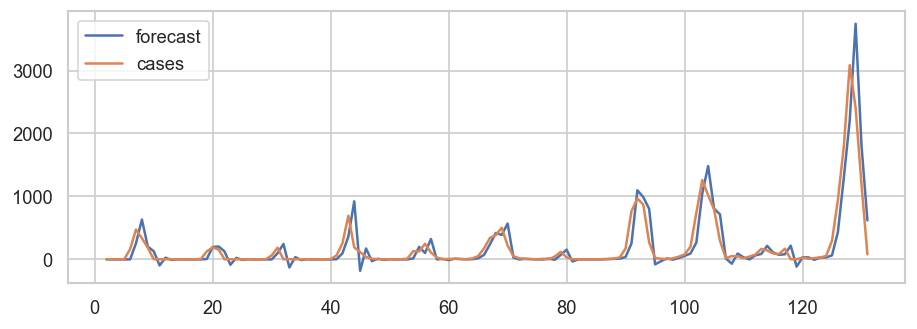

In [59]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [62]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.cases[:104]
test = df.cases[104:]

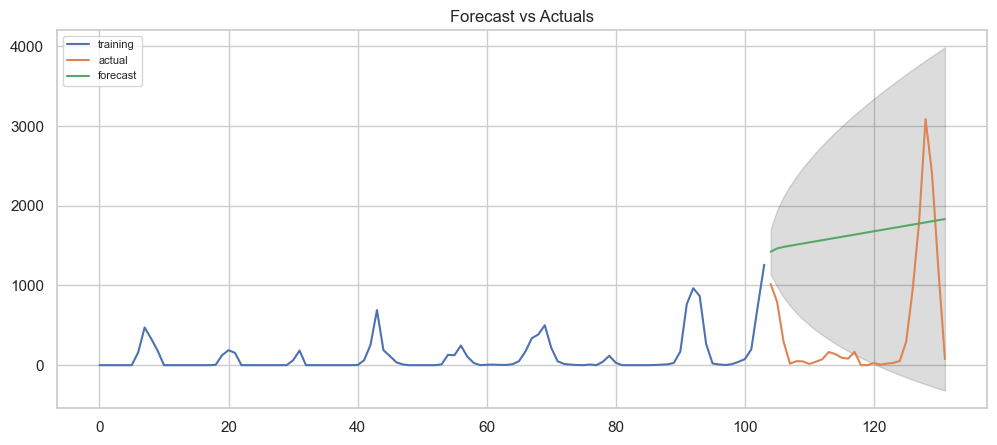

In [66]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(28, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.cases   No. Observations:                  102
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -650.892
Method:                       css-mle   S.D. of innovations            139.500
Date:                Mon, 07 Nov 2022   AIC                           1313.784
Time:                        22:07:08   BIC                           1329.534
Sample:                             2   HQIC                          1320.162
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4906      0.482      1.018      0.309      -0.454       1.436
ar.L1.D2.cases     0.3510      0.099      3.554      0.000       0.157       0.544
ar.L2.D2.cases    -0.0971      0.107

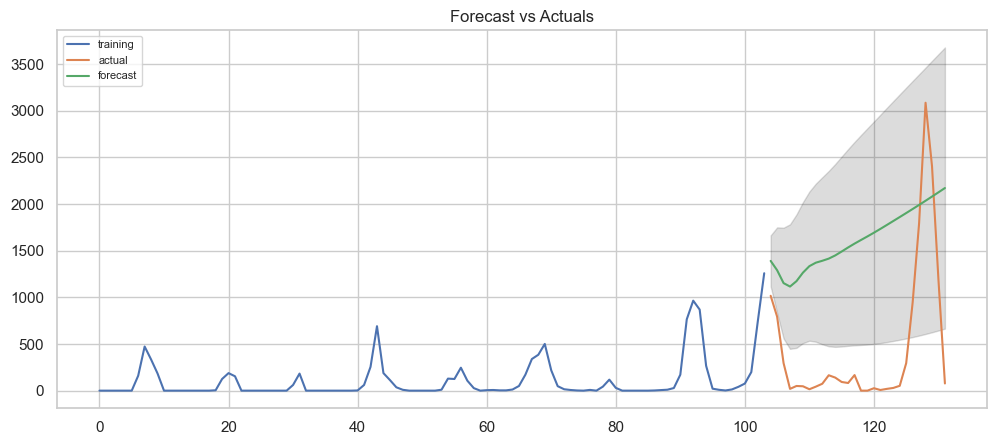

In [68]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(28, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [69]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': inf,
 'me': 1158.8353246862375,
 'mae': 1257.1145863567285,
 'mpe': inf,
 'rmse': 1342.3316953802741,
 'acf1': 0.6941415203086877,
 'corr': 0.4960034143175997,
 'minmax': 0.7870611022395648}